# **Capstone project : Providing data-driven suggestions to HR of Salifort Motors**

## **PACE: Plan Stage**

### **Understanding the business scenerio and problem**
The HR at Salifort Motors wants to take initiatives to improve their employee satisfaction levels because there is high turnover in the company.They have collected data from the employees and have share it with me . As a data analytic professional they have asked me to provide some data driven suggestions based on the data they have shared with me. 

**HR has asked me to expalin what is likely to make the employees leave the company?**

My **goal** is to analyse the data collected and build a model that predicts whether or not an employee will leave a company.By predicting the employees likely to quit, I will be able to identify the important factors that contribute to their leaving. 

## Step1: Imports
* Import Packages
* Load datasets

### **Import Packages**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, accuracy_score, recall_score,f1_score,roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pickle

In [2]:
df=pd.read_csv('HR_capstone_dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers) 


### Gather basic information about the data

In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Descriptive statistics of the data

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Removing white space and renaming the columns

In [6]:
#Display all the column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
#Removing the white space and converting the columns in to lower case
df.columns=[x.lower().strip() for x in df.columns]

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [9]:
#Renaming the columns
df=df.rename(columns={'time_spend_company':'tenure','average_montly_hours':'average_monthly_hours'})

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [11]:
#Checking for missing values in the data
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data set so we can proceed without taking any action 

### Check duplicates

In [12]:
#Checking for duplicates in the data
df.duplicated().sum()

3008

In [13]:
#There are 3008 duplicates in the dataset so we need to check with them in order to see whats going on..
mask=df.duplicated()
duplicates=df[mask]
duplicates.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


We will have to check how likely it is that these are legitmate entries. In other words how likely it is that two employees self reported the exact same response for every column? 
With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. We can proceed by dropping them.


In [14]:
#Dropping the duplicates from the dataset
df=df.drop_duplicates(keep="first")
df.shape

(11991, 10)

### Check for Outliers

Text(0.5, 1.0, 'Box plot for Tenure')

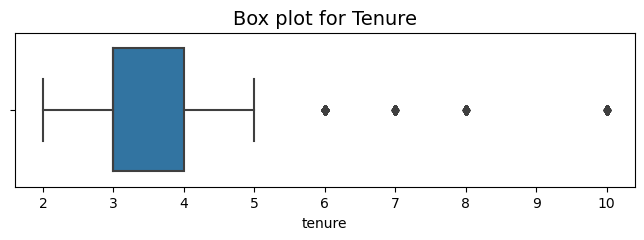

In [15]:
#Checking for outliers
plt.figure(figsize=(8,2))
sns.boxplot(x='tenure', data=df)
plt.title('Box plot for Tenure', fontsize=14)

As shown by the boxlplot there are outliers in the `tenure` column.
We will investigate how many outliers are in the `tenure` variable.

In [16]:
#As seen in the blox plot there are some outliers. we need to identify the outliers in the data
percentile_25 = df['tenure'].quantile(0.25)
percentile_75 = df['tenure'].quantile(0.75)
#Calculate the interquantile range
iqr=percentile_75 - percentile_25
#Calculating the upper and lower threshold limit
upper_limit= percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
print('Upper Limit is :', upper_limit)
print('Lower Limit is :', lower_limit)

#Removing outliers from the data
df_outliers=df[(df['tenure']>upper_limit) | (df['tenure']< lower_limit)]
print('Total outliers in tenure variable :', len(df_outliers))

Upper Limit is : 5.5
Lower Limit is : 1.5
Total outliers in tenure variable : 824


Based on the model we choose, we will have to decide if we can keep or remove the outliers from the data. Some models are sensitive to outliers while others can handle the well. We are proceeding with the decison tree model which is not sensitive to the model so we will not drop them from the dataset


## PACE: Analyze Stage

In [17]:
#get the number of people who have left vs stayed
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [18]:
df['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

As seen there is a class imbalance in the data set as only 16 percent of the data contains only those who quit. This will help us ind deciding which evaluation metrics for the model to choose. For example we cannot choose accuaracy because the model can give us accouracy of 84 even without detecting a single employee who has quit.

### Data Visualizations

Creating plots to visualize the relationship between the varaibles. I have used subplots to compare the two plots for better understaing of the visualization. The first plot is a box plot of varibles `average_monthly_hours` and `number_projects` comparing the disribution of employees who stayed vs those who left. 

Boxplots help us in visualizing the distribution of data and identifying the outliers but they wil not tell us about the sample size of the data, so we need a histogram to visualize the data for `number_project` stacked for those who stayed vs those who left.

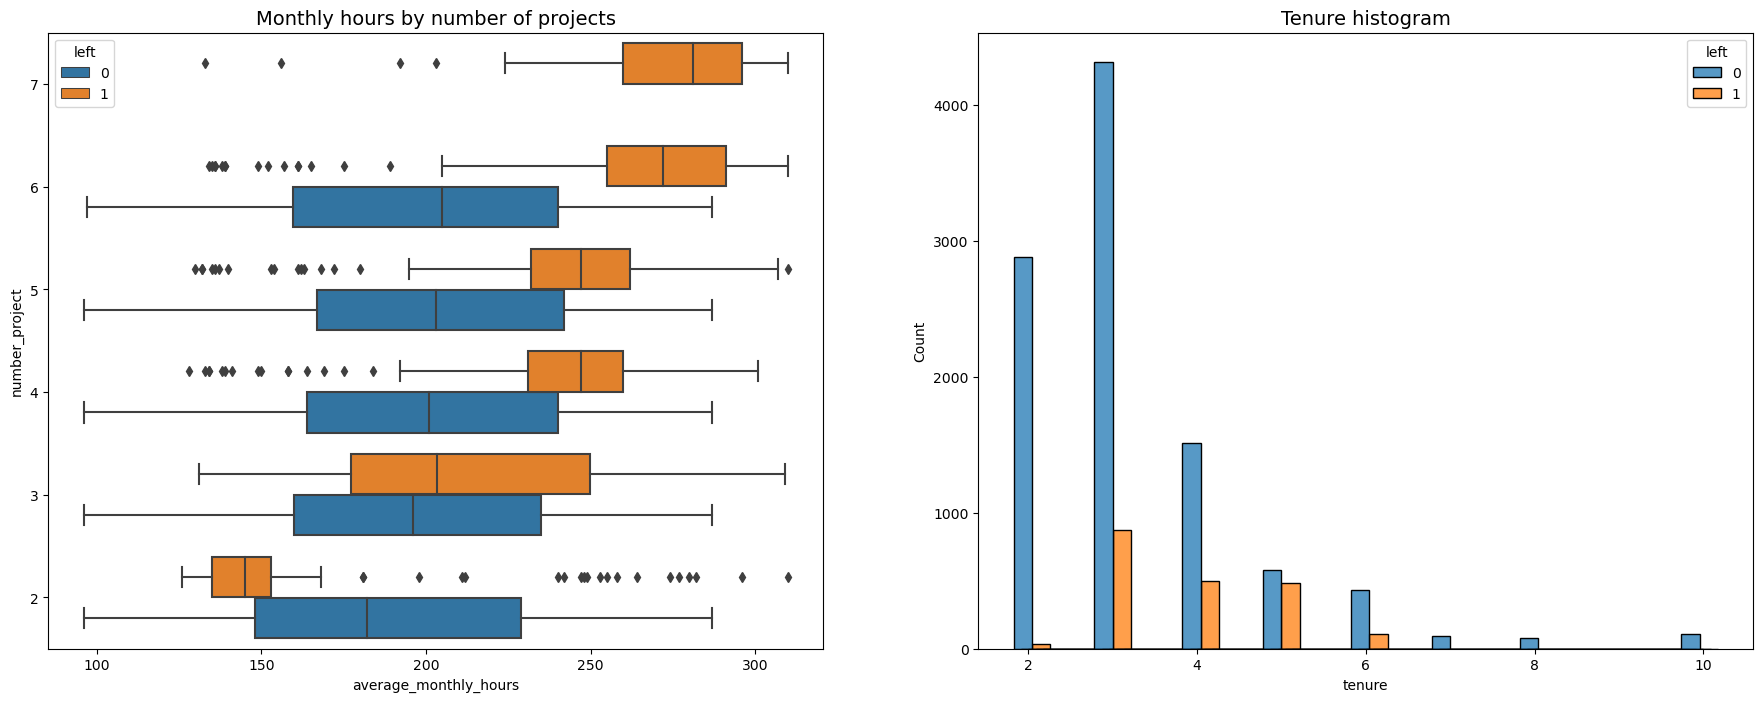

In [19]:
fig, ax=plt.subplots(1,2, figsize=(22,8))
#Create a box plot showing average monthly hours distribution for number of project comapring employees who stayed
sns.boxplot(data=df,x='average_monthly_hours', y='number_project', hue='left', orient='h', ax= ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

As seen in the boxplot visualization the mean hours of each group (stayed and left) increasing with number of projects worked. There are few other observations:

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired.. The employees in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.


In [20]:
#Calculate the mean and median satisactions scores by those who left vs not
df.groupby('left')['satisfaction_level'].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected the mean and median score of satisfaction level of employees for those who left and those who stayed are different.

Text(0.5, 1.0, 'Salary histogram by tenure: Long-tenured people')

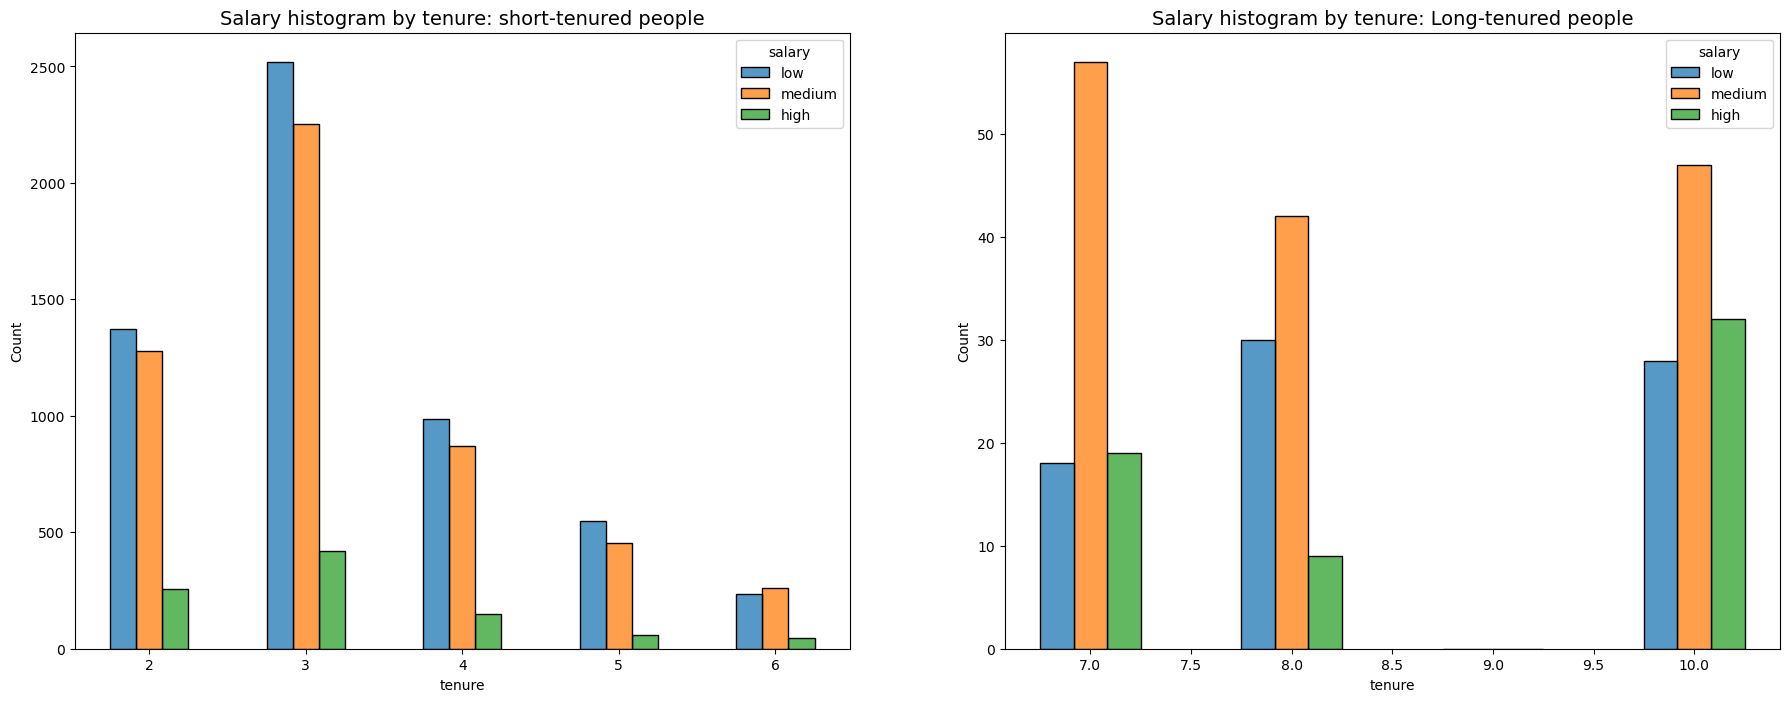

In [21]:
fig,ax=plt.subplots(1,2, figsize=(22,8))
#Define short  and long tenured employees
tenure_short=df[df['tenure']<7]
tenure_long=df[df['tenure']>6]
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, hue_order=['low','medium','high'],
            multiple='dodge', shrink=0.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, hue_order=['low','medium','high'],
            multiple='dodge', shrink=0.5, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: Long-tenured people', fontsize='14')

The long tenure empoyees have not disproportionatly high salaries

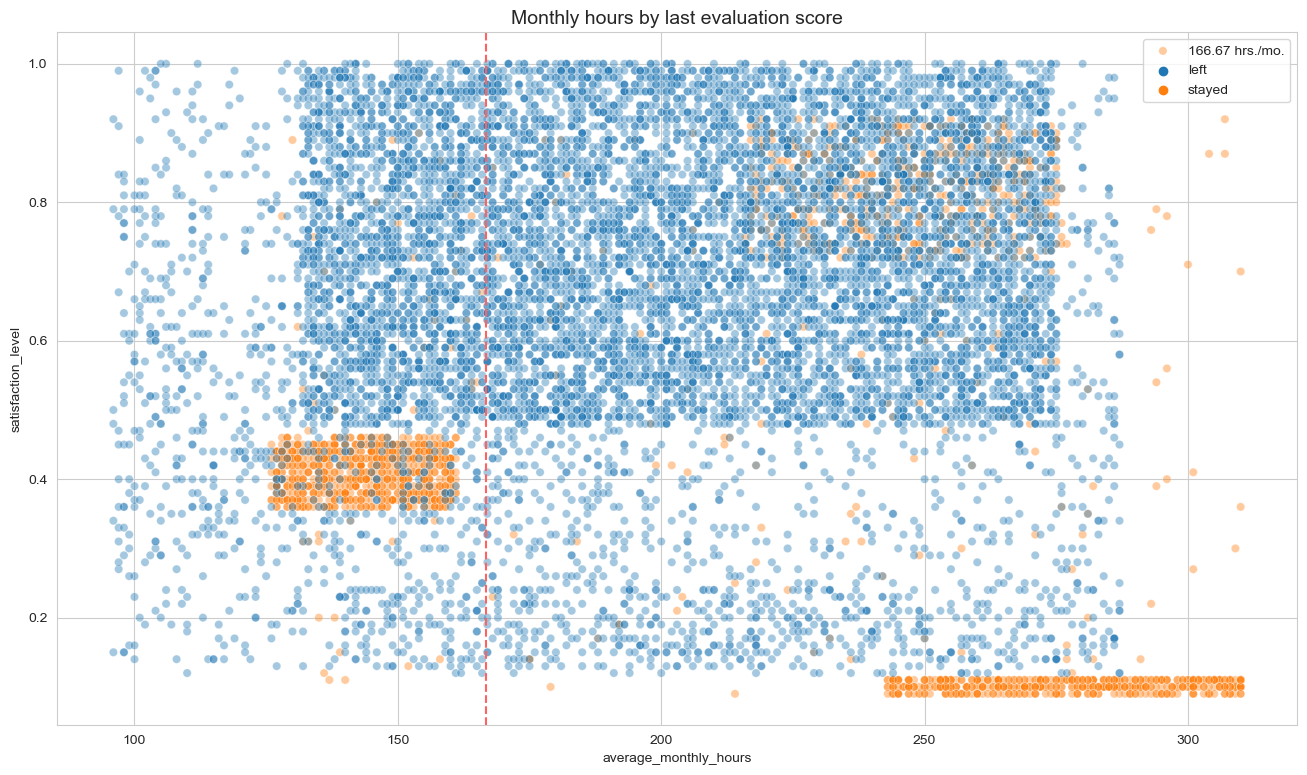

In [22]:
#Create a scatter plot of average monthly hours vs satisfication level.
plt.figure(figsize=(16,9))
sns.set_style('whitegrid')
sns.scatterplot(x='average_monthly_hours', y='satisfaction_level', data=df, hue='left', alpha=0.4)
plt.axvline(x=166.7,color='#ff6361',ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, you could examine whether employees who worked very long hours were promoted in the last five years.

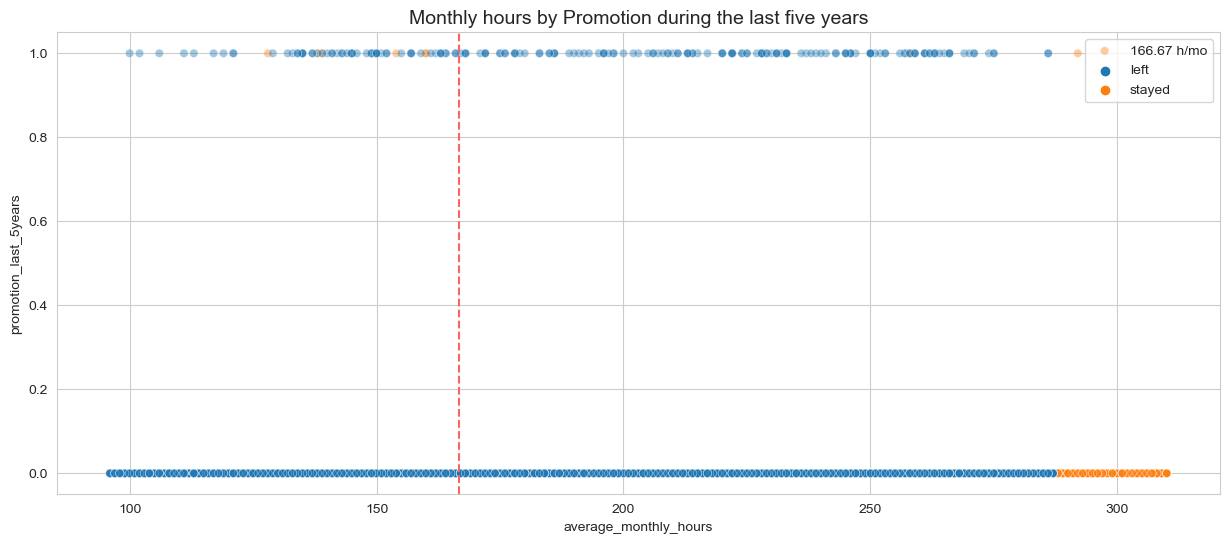

In [23]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67,color='#ff6361', ls='--')
plt.title('Monthly hours by Promotion during the last five years', fontsize=14)
plt.legend(labels=['166.67 h/mo','left', 'stayed'])

The follwing observations can be made from the graph
- few employess left the company who were promoted during the last five years despite working more than the avrage number of hours.
- The employees who worked the longest hours who were not promoted left the company
- Very few employees who worked longest hours were promoted

### Correlation between the variables

/var/folders/k_/52pbgzjn5xngncqqpmh__fgw0000gn/T/ipykernel_12767/2713137973.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


Text(0.5, 1.0, 'Correlation heatmap')

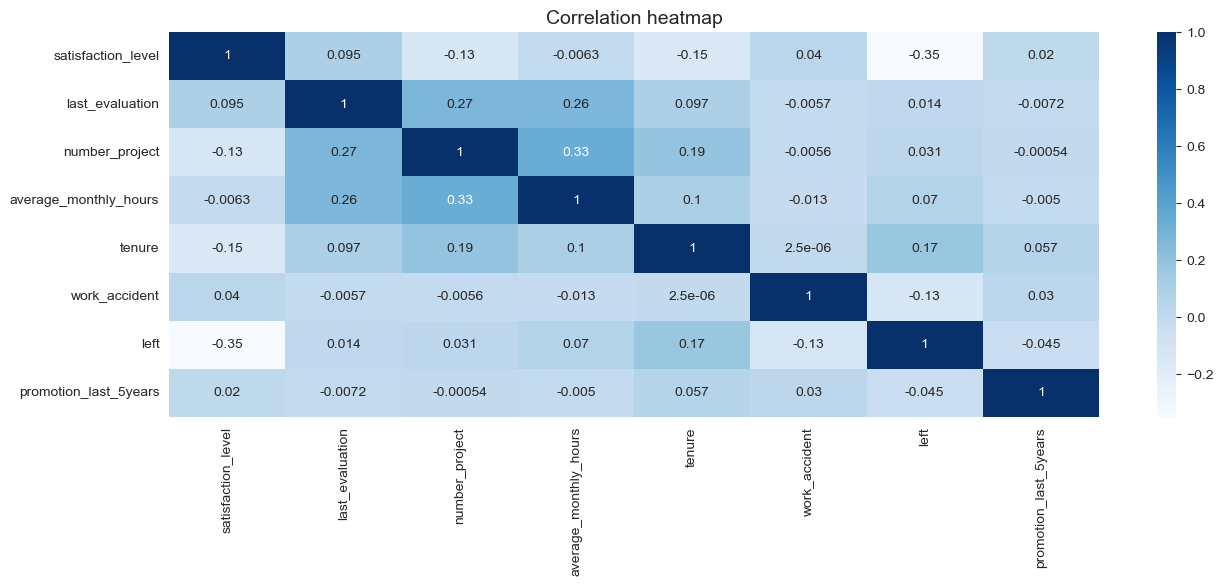

In [24]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation heatmap', fontsize=14)

As we can see that there is a negative correlation between variabel left and satisfaction level and promotion in the last five years and postive correaltion between the variables  average monthly hours, tenure and last evaluation.

### Insights

- From EDA, it seems that  due to poor management of the company employees are leaving the organization:employees who worked long hours were not promoted during five years. As a reult most of them left the job.
- Leaving is also tied to long working hors and many projects resulting in less satisfation

## PACE: Construct Stage

Encoding the non numeric variables before splitting the data. `salary` and `department` are two variables that can be encoded. `department` is categorical so we can encode it. `salary` is also categorical too but it is ordinal so we need to give it a hierarchy instead of dummy encoding it. 

In [25]:
#Encode the salary as ordianl numeric category
df_enc= df.copy()
df_enc['salary']=(df_enc['salary'].astype('category').cat.set_categories(['low','medium','high']).cat.codes)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [26]:
#Dummy encode the department column
df_enc=pd.get_dummies(df_enc, drop_first=False)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
#Isolate the outcome and predictor variables.
y=df_enc['left']
X=df_enc.copy()
X=X.drop('left', axis=1)

In [28]:
#Split the data
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.25, stratify=y,random_state=42)

### Decison Tree

In [29]:
tree=DecisionTreeClassifier(random_state=42)
#Assign a dictonary of hyper parameters to search
cv_params={'max_depth':[3,4,6,8,None],
          'min_samples_leaf':[2,5,1],
          'min_samples_split':[2,4,6]}
#Assign a dictionary of scoring metrics
scoring={'accuracy','precision','recall','f1','roc_auc'}
#Initiate the gridsearch
tree1=GridSearchCV(tree, cv_params,scoring=scoring, cv=4, refit='roc_auc')

Fit the decison tree model to the training data

In [30]:
%%time
tree1.fit(X_train, y_train)


CPU times: user 3.66 s, sys: 64.6 ms, total: 3.72 s
Wall time: 3.72 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'precision', 'f1', 'roc_auc', 'accuracy', 'recall'})

In [31]:
#Check the best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

Identify the best AUC score chieved by the decison tree model on the training set


In [32]:
#Check the best AUC score by decison tree model on the traning set
tree1.best_score_

0.9758952535925409

0.975 is a verys strong AUC score which shows that the model is capable of predicting employee who are likely to leave the job.

Writing a function that can extract all the scores from grid search

In [33]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [34]:
#Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.966878,0.918288,0.941941,0.981208,0.975895


In [36]:
#writing a function that will extract all the scores from GridSearch
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [43]:
#Get all the scores
test_score=get_scores('Decison tree model',tree1, X_test, y_test)
test_score

,model,precision,recall,f1,accuracy,AUC
0,Decison tree model,0.97463,0.925703,0.949537,0.983656,0.960451


Satisfaction level, Last evaluation, number of projects, tenure and average monthly hours are the most important features in the dataset that will determine whether a employee will stay or leave the organization. 

### Feature engineering 

we will create some new variables and drop some in order to  deal with data leakage. Data leakage is when we use data to train the model that should not be used during training. Training a model with leaked data can give us unrealistic scores. 
In our case it is likely that the company wont hava `satisfaction_level`reported for all employees. It is also likely that `average_monthly_hours` is the source of data leakage; if employees have already decided upn quitting or have already been identified by the management to be fired, they are likely to work less hours.

In round one decison tree included all the variables. In round 2 we will drop`satisfaction_level` and create a new binary variable `overworked` from `average_monthly_hours`. 

In [48]:
df1= df_enc.drop('satisfaction_level', axis=1)
df1.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
#Create an overworked column 
df1['overworked']=df1['average_monthly_hours']
df1.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,157
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,262
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,272
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,223
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,159


In [50]:
print('Max Hours', df1['overworked'].max())
print('Min Hours', df1['overworked'].min())

Max Hours 310
Min Hours 96


In [51]:
df1['overworked']= (df1['overworked']>175).astype(int)

In [52]:
df1.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [53]:
#Drop average_monthly_hours column from the data
df1=df1.drop('average_monthly_hours', axis=1)
df1.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [54]:
#isolate the outcome variable 
y= df1['left']
#Select the features
X=df1.copy()
X=X.drop('left', axis=1)

In [55]:
#Create the test data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, stratify=y, random_state=42)

In [56]:
#Instantiate model 
tree=DecisionTreeClassifier(random_state=42)
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[3,4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [57]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 3.09 s, sys: 62.7 ms, total: 3.16 s
Wall time: 3.15 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'precision', 'f1', 'roc_auc', 'accuracy', 'recall'})

In [58]:
#Check the best parameters
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [59]:
#Check best AUC score on CV
tree2.best_score_


0.9560690460829713

The model performs best even without the satisfactionlevel and detail worked hours

In [60]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [61]:
#Get all CV scores
tree2_cv_results = make_results('decision tree cv', tree2, 'auc')
tree2_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.831453,0.902894,0.864811,0.952851,0.956069


In [63]:
#Get prediction on test data
get_scores('Decison tree model',tree2, X_test, y_test)

,model,precision,recall,f1,accuracy,AUC
0,Decison tree model,0.808772,0.925703,0.863296,0.951301,0.941051


With fewer features this model performs almost as good as the first model. 

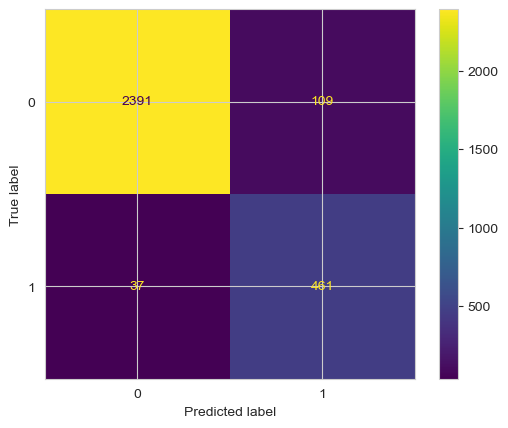

In [64]:
# Generate array of values for confusion matrix
preds = tree2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=tree2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=tree2.classes_)
disp.plot(values_format='');

This model predicts more false postives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.r exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features in the random forest model

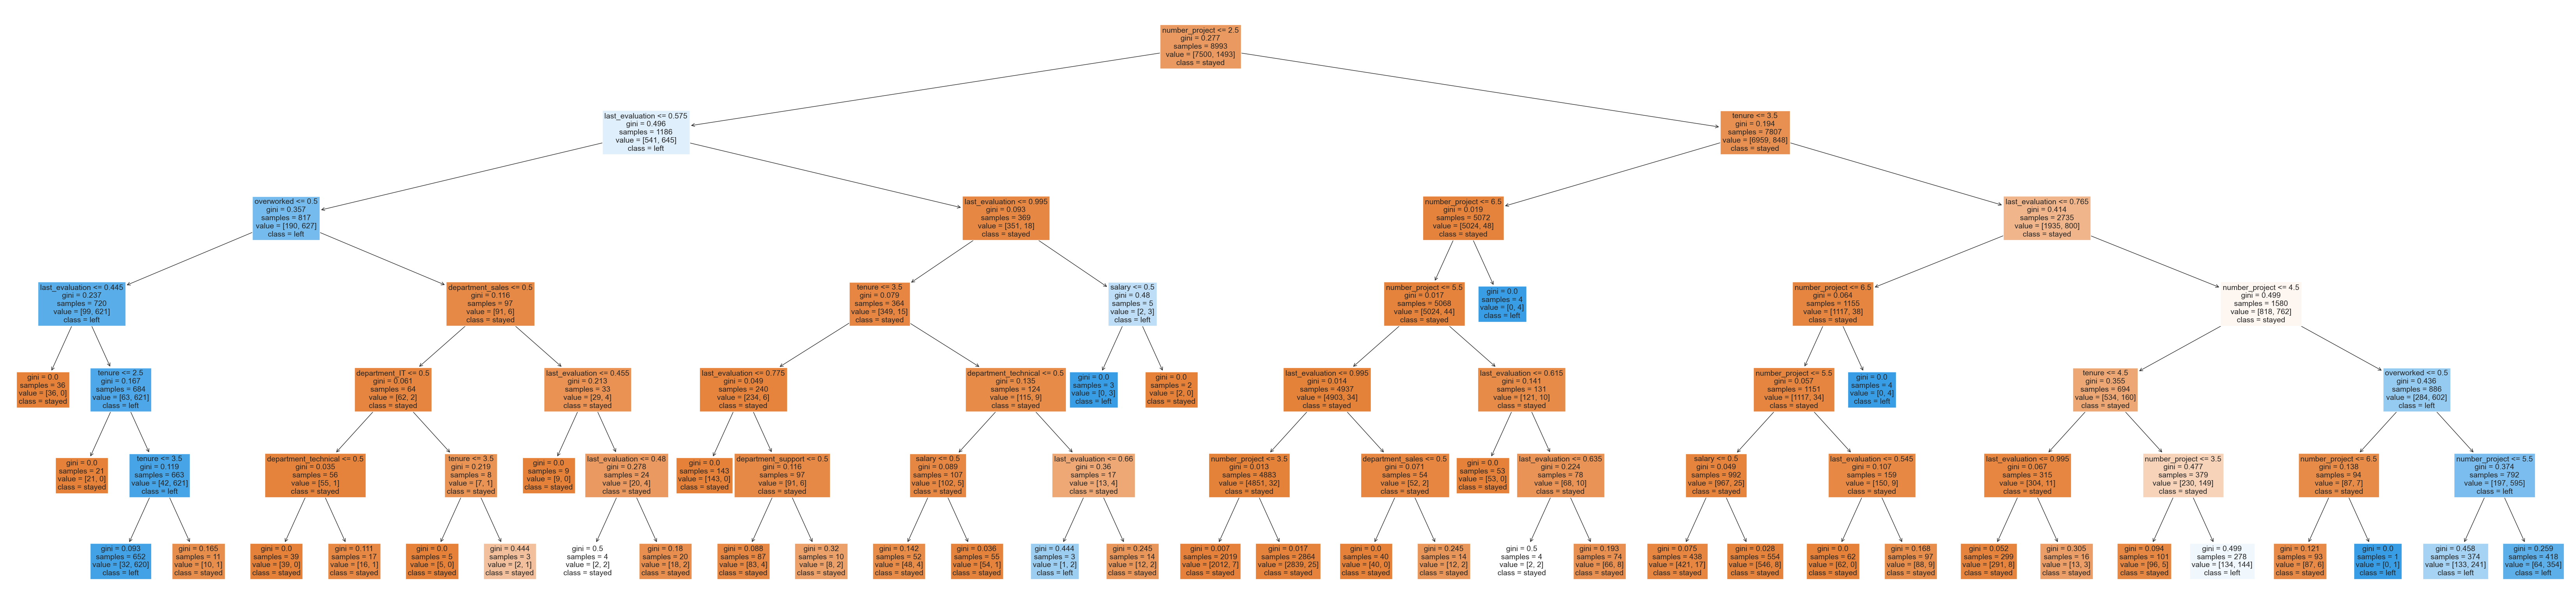

In [65]:
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_,max_depth=6, fontsize=14, feature_names=X.columns,
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [66]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.343930
last_evaluation,0.335089
tenure,0.213517
overworked,0.104462
salary,0.001610
department_technical,0.000630
department_sales,0.000434
department_support,0.000238
department_IT,0.000090


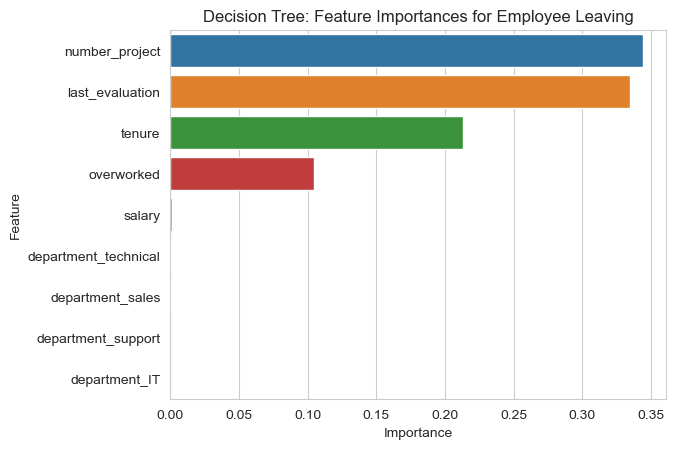

In [67]:

sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, last_evaluation, number_project, tenure, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left.

## PACE : Execute Stage

### Evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example. 
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.



### Summary of Decison Tree model results
After conducting feature engineering, the decision tree model achieved AUC of 95.6%, precision of 83.0%, recall of 90.2%, f1-score of 86.4%, and accuracy of 95.2%, on the test set.

### Conclusion and recommendations to stakeholders

The models and the feature importances extracted from decison tree model confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 